In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 100

rootdir = '/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/'
fname = rootdir + 'Play_by_Play_New.csv'

pbp = pd.read_csv(fname)
pbp0 = pbp
pbp = pbp[pbp.Season >= 2014]

In [2]:
pbp.loc[:, 'Game_Time'] = (720. * (pbp.Period - 1) + (720. - pbp.Play_Clock_Time))
pbp.loc[:, 'Score_diff'] = pbp.Home_PTS - pbp.Visitor_PTS

/Users/hayk/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/hayk/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [104]:
np.sum([(posslog14[posslog14.GAME_ID == gameid].GAME_CLOCK_START.max() < 1000) for gameid in posslog14.GAME_ID.unique()])

11

In [46]:
shotlog14 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2014-15_nba_shot_log.txt', delimiter='\t')
shotlog15 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2015-16_nba_shot_log.txt', delimiter='\t')
shotlog16 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2016-17_nba_shot_log.txt', delimiter='\t')
posslog14 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2014-15_nba_possession_log.txt', delimiter='\t')
posslog15 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2015-16_nba_possession_log.txt', delimiter='\t')
posslog16 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2016-17_nba_possession_log.txt', delimiter='\t')

# shotlog14.loc[:, 'GAME_TIME'] = 0.1 * (7200. * (shotlog14.PERIOD - 1) + (7200. - shotlog14.GAME_CLOCK))
# shotlog15.loc[:, 'GAME_TIME'] = 0.1 * (7200. * (shotlog15.PERIOD - 1) + (7200. - shotlog15.GAME_CLOCK))
# shotlog16.loc[:, 'GAME_TIME'] = 0.1 * (7200. * (shotlog16.PERIOD - 1) + (7200. - shotlog16.GAME_CLOCK))

# posslog14.loc[:, 'GAME_TIME_START'] = 0.1 * (7200. * (posslog14.PERIOD - 1) + (7200. - posslog14.GAME_CLOCK_START))
# posslog15.loc[:, 'GAME_TIME_START'] = 0.1 * (7200. * (posslog15.PERIOD - 1) + (7200. - posslog15.GAME_CLOCK_START))
# posslog16.loc[:, 'GAME_TIME_START'] = 0.1 * (7200. * (posslog16.PERIOD - 1) + (7200. - posslog16.GAME_CLOCK_START))
# posslog14.loc[:, 'GAME_TIME_END'] = 0.1 * (7200. * (posslog14.PERIOD - 1) + (7200. - posslog14.GAME_CLOCK_END))
# posslog15.loc[:, 'GAME_TIME_END'] = 0.1 * (7200. * (posslog15.PERIOD - 1) + (7200. - posslog15.GAME_CLOCK_END))
# posslog16.loc[:, 'GAME_TIME_END'] = 0.1 * (7200. * (posslog16.PERIOD - 1) + (7200. - posslog16.GAME_CLOCK_END))

<IPython.core.display.Javascript object>


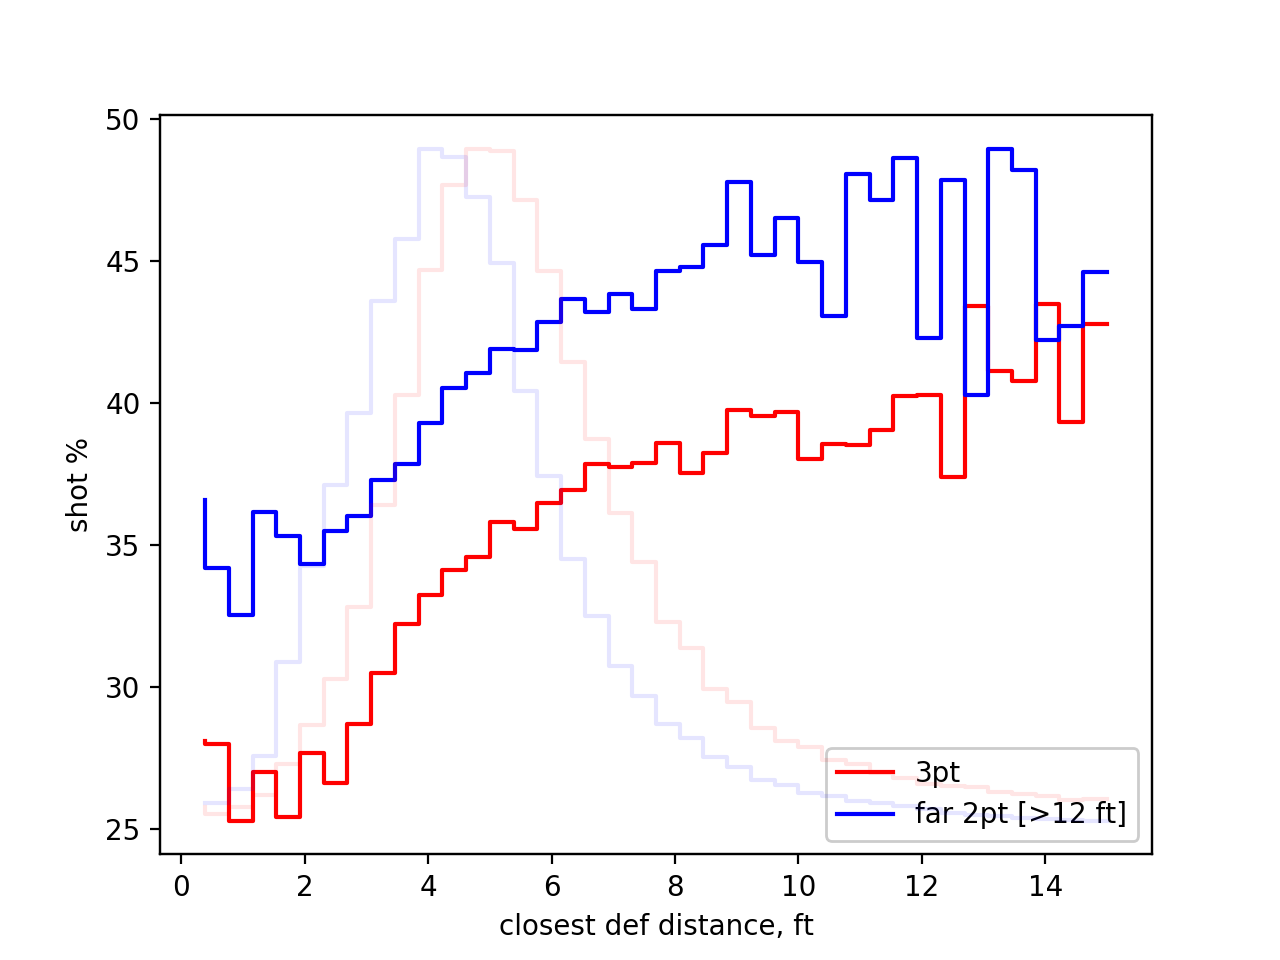

In [287]:
miss_3pt = np.concatenate((
    np.array(shotlog14[(shotlog14.PTS_TYPE == 3) & (shotlog14.SHOT_RESULT == 'missed')].CLOSE_DEF_DIST),
    np.array(shotlog15[(shotlog15.PTS_TYPE == 3) & (shotlog15.SHOT_RESULT == 'missed')].CLOSE_DEF_DIST),
    np.array(shotlog16[(shotlog16.PTS_TYPE == 3) & (shotlog16.SHOT_RESULT == 'missed')].CLOSE_DEF_DIST)
    ))
made_3pt = np.concatenate((
    np.array(shotlog14[(shotlog14.PTS_TYPE == 3) & (shotlog14.SHOT_RESULT == 'made')].CLOSE_DEF_DIST),
    np.array(shotlog15[(shotlog15.PTS_TYPE == 3) & (shotlog15.SHOT_RESULT == 'made')].CLOSE_DEF_DIST),
    np.array(shotlog16[(shotlog16.PTS_TYPE == 3) & (shotlog16.SHOT_RESULT == 'made')].CLOSE_DEF_DIST)
    ))

far_2pt_dist = 12.
miss_f2pt = np.concatenate((
    np.array(shotlog14[(shotlog14.PTS_TYPE == 2) & (shotlog14.SHOT_DIST > far_2pt_dist) & (shotlog14.SHOT_RESULT == 'missed')].CLOSE_DEF_DIST),
    np.array(shotlog15[(shotlog15.PTS_TYPE == 2) & (shotlog15.SHOT_DIST > far_2pt_dist) & (shotlog15.SHOT_RESULT == 'missed')].CLOSE_DEF_DIST),
    np.array(shotlog16[(shotlog16.PTS_TYPE == 2) & (shotlog16.SHOT_DIST > far_2pt_dist) & (shotlog16.SHOT_RESULT == 'missed')].CLOSE_DEF_DIST)
    ))
made_f2pt = np.concatenate((
    np.array(shotlog14[(shotlog14.PTS_TYPE == 2) & (shotlog14.SHOT_DIST > far_2pt_dist) & (shotlog14.SHOT_RESULT == 'made')].CLOSE_DEF_DIST),
    np.array(shotlog15[(shotlog15.PTS_TYPE == 2) & (shotlog15.SHOT_DIST > far_2pt_dist) & (shotlog15.SHOT_RESULT == 'made')].CLOSE_DEF_DIST),
    np.array(shotlog16[(shotlog16.PTS_TYPE == 2) & (shotlog16.SHOT_DIST > far_2pt_dist) & (shotlog16.SHOT_RESULT == 'made')].CLOSE_DEF_DIST)
    ))

bins = np.linspace(0, 15, 40)
dat_miss_f2pt = np.histogram(miss_f2pt, bins=bins)[0];
dat_made_f2pt = np.histogram(made_f2pt, bins=bins)[0];

# %matplotlib notebook
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.set_xlabel('closest def distance, ft')
# ax.set_ylabel('far 2pt %')
# ax2 = ax.twinx()
# ax2.set_ylabel('far 2pt shots made')
# ax2.set_yticks([])
# ax2.step(bins[1:], 1. * (dat_miss + dat_made) / max(dat_miss + dat_made), alpha=0.1);
# ax.step(bins[1:], 100. * dat_made / (dat_miss + dat_made), c='red');

dat_miss_3pt = np.histogram(miss_3pt, bins=bins)[0];
dat_made_3pt = np.histogram(made_3pt, bins=bins)[0];

%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel('closest def distance, ft')
ax.set_ylabel(r'shot %')
ax2 = ax.twinx()

ax2.set_yticks([])

ax2.step(bins[1:], 1. * (dat_miss_3pt + dat_made_3pt) / max(dat_miss_3pt + dat_made_3pt), 
         alpha=0.1, c='red');
ax.step(bins[1:], 100. * dat_made_3pt / (dat_miss_3pt + dat_made_3pt), c='red',
        label='3pt');

ax2.step(bins[1:], 1. * (dat_miss_f2pt + dat_made_f2pt) / max(dat_miss_f2pt + dat_made_f2pt), 
         alpha=0.1, c='blue');
ax.step(bins[1:], 100. * dat_made_f2pt / (dat_miss_f2pt + dat_made_f2pt), c='blue',
       label='far 2pt [>{} ft]'.format(int(far_2pt_dist)));
leg = ax.legend(loc='lower right', fancybox=True, framealpha=1)
leg.get_frame().set_facecolor('none')


<IPython.core.display.Javascript object>


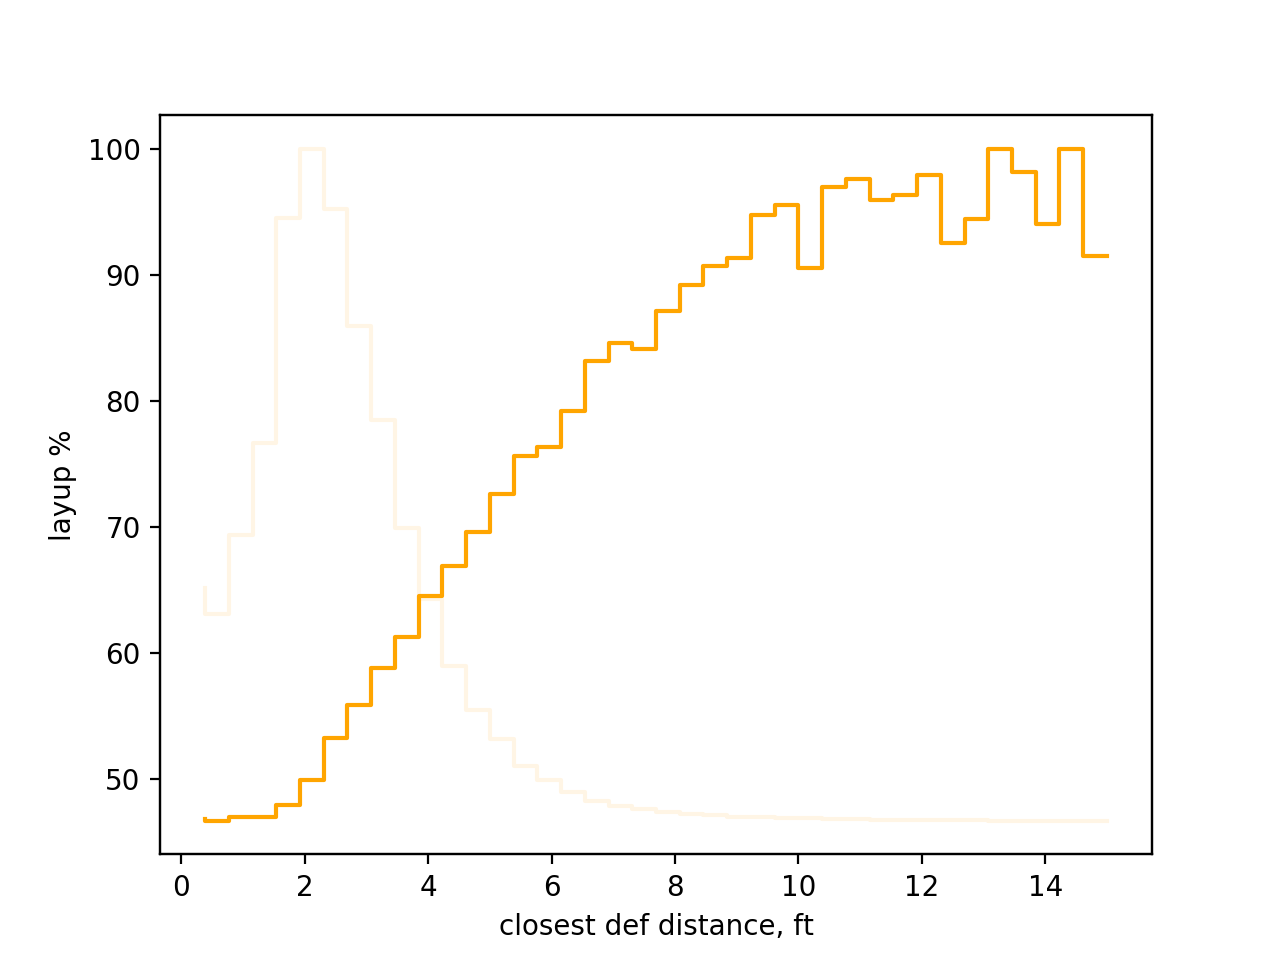

In [283]:
layup_dist = 10.
miss_layup = np.concatenate((
    np.array(shotlog14[(shotlog14.PTS_TYPE == 2) & (shotlog14.SHOT_DIST <= layup_dist) & (shotlog14.SHOT_RESULT == 'missed')].CLOSE_DEF_DIST),
    np.array(shotlog15[(shotlog15.PTS_TYPE == 2) & (shotlog15.SHOT_DIST <= layup_dist) & (shotlog15.SHOT_RESULT == 'missed')].CLOSE_DEF_DIST),
    np.array(shotlog16[(shotlog16.PTS_TYPE == 2) & (shotlog16.SHOT_DIST <= layup_dist) & (shotlog16.SHOT_RESULT == 'missed')].CLOSE_DEF_DIST)
    ))
made_layup = np.concatenate((
    np.array(shotlog14[(shotlog14.PTS_TYPE == 2) & (shotlog14.SHOT_DIST <= layup_dist) & (shotlog14.SHOT_RESULT == 'made')].CLOSE_DEF_DIST),
    np.array(shotlog15[(shotlog15.PTS_TYPE == 2) & (shotlog15.SHOT_DIST <= layup_dist) & (shotlog15.SHOT_RESULT == 'made')].CLOSE_DEF_DIST),
    np.array(shotlog16[(shotlog16.PTS_TYPE == 2) & (shotlog16.SHOT_DIST <= layup_dist) & (shotlog16.SHOT_RESULT == 'made')].CLOSE_DEF_DIST)
    ))

bins = np.linspace(0, 15, 40)
dat_miss = np.histogram(miss_layup, bins=bins)[0];
dat_made = np.histogram(made_layup, bins=bins)[0];

%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel('closest def distance, ft')
ax.set_ylabel('layup %')
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.step(bins[1:], 1. * (dat_miss + dat_made) / max(dat_miss + dat_made), alpha=0.1, c='orange');
ax.step(bins[1:], 100. * dat_made / (dat_miss + dat_made), c='orange');



In [154]:
# %matplotlib notebook
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()


In [107]:
from scipy.interpolate import splev, splrep
from tqdm import tqdm_notebook

shotlog14 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2014-15_nba_shot_log.txt', delimiter='\t')
shotlog15 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2015-16_nba_shot_log.txt', delimiter='\t')
shotlog16 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2016-17_nba_shot_log.txt', delimiter='\t')
posslog14 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2014-15_nba_possession_log.txt', delimiter='\t')
posslog15 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2015-16_nba_possession_log.txt', delimiter='\t')
posslog16 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2016-17_nba_possession_log.txt', delimiter='\t')

shotlog14.loc[:, 'GAME_TIME'] = 0.1 * (7200. * (shotlog14.PERIOD - 1) + (7200. - shotlog14.GAME_CLOCK))
shotlog15.loc[:, 'GAME_TIME'] = 0.1 * (7200. * (shotlog15.PERIOD - 1) + (7200. - shotlog15.GAME_CLOCK))
shotlog16.loc[:, 'GAME_TIME'] = 0.1 * (7200. * (shotlog16.PERIOD - 1) + (7200. - shotlog16.GAME_CLOCK))

posslog14.loc[:, 'GAME_TIME_START'] = 0.1 * (7200. * (posslog14.PERIOD - 1) + (7200. - posslog14.GAME_CLOCK_START))
posslog15.loc[:, 'GAME_TIME_START'] = 0.1 * (7200. * (posslog15.PERIOD - 1) + (7200. - posslog15.GAME_CLOCK_START))
posslog16.loc[:, 'GAME_TIME_START'] = 0.1 * (7200. * (posslog16.PERIOD - 1) + (7200. - posslog16.GAME_CLOCK_START))
posslog14.loc[:, 'GAME_TIME_END'] = 0.1 * (7200. * (posslog14.PERIOD - 1) + (7200. - posslog14.GAME_CLOCK_END))
posslog15.loc[:, 'GAME_TIME_END'] = 0.1 * (7200. * (posslog15.PERIOD - 1) + (7200. - posslog15.GAME_CLOCK_END))
posslog16.loc[:, 'GAME_TIME_END'] = 0.1 * (7200. * (posslog16.PERIOD - 1) + (7200. - posslog16.GAME_CLOCK_END))

def minima(a, b = None):
        if b is None:
            b = a
        return b[np.r_[True, a[1:] < a[:-1]] & np.r_[a[:-1] < a[1:], True]]

all_games = pbp.Game_id.unique()
stat_games = []
stat_scores = []
stat_times = []
stat_turnovers = []
stat_open_pc_run = []
stat_open_pc = []
stat_3pt_pc_run = []
stat_3pt_pc = []

stat_shot_gameclock = []

def_dist = []

for gameid in tqdm_notebook(all_games):
    our_game = pbp[pbp.Game_id == gameid]
    game_season = our_game.Season.iloc[0]
    if game_season == 2014:
        ourgame_shotlog = shotlog14[shotlog14.GAME_ID == gameid]
        ourgame_posslog = posslog14[posslog14.GAME_ID == gameid]
    elif game_season == 2015:
        ourgame_shotlog = shotlog15[shotlog15.GAME_ID == gameid]
        ourgame_posslog = posslog15[posslog15.GAME_ID == gameid]
    elif game_season == 2016:
        ourgame_shotlog = shotlog16[shotlog16.GAME_ID == gameid]
        ourgame_posslog = posslog16[posslog16.GAME_ID == gameid]
    else:
        print 'WTF?'
        break
    # some games count GAME_CLOCK in ms some in s
#     if ourgame_posslog.GAME_CLOCK_START.max() < 1000: 
#         # in seconds
#         multiplier = 1
#         ourgame_posslog.loc[:, 'GAME_TIME_START'] = multiplier * ((720. / multiplier) 
#                                                                   * (ourgame_posslog.PERIOD - 1) 
#                                                                   + ((720. / multiplier) 
#                                                                      - ourgame_posslog.GAME_CLOCK_START))
#         ourgame_posslog.loc[:, 'GAME_TIME_END'] = multiplier * ((720. / multiplier) 
#                                                                   * (ourgame_posslog.PERIOD - 1) 
#                                                                   + ((720. / multiplier) 
#                                                                      - ourgame_posslog.GAME_CLOCK_END))
    if (not (gameid in ourgame_shotlog.GAME_ID.unique())) or (not (gameid in ourgame_posslog.GAME_ID.unique())):
        continue
    home_team = our_game.Home_Tm.iloc[0]
    away_team = our_game.Away_Tm.iloc[0]
    home_team_id = our_game.Home_Team_id.iloc[0]
    away_team_id = our_game.Visitor_Team_id.iloc[0]
    x = np.array(our_game.Game_Time)
    for homvis in [-1, 1]:
        if homvis == -1:
            our_team_id = away_team_id
            op_team_id = home_team_id
            op_team = home_team
        else:
            our_team_id = home_team_id
            op_team_id = away_team_id
            op_team = away_team

        y = homvis * np.array(our_game.Score_diff)
        spl = splrep(x, y, s=600)
        for q in range(4):
            x2 = np.linspace(720. * q, 720. * (q + 1), 500)
            y2 = splev(x2, spl)
            max_time = minima(-y2, x2)
            min_time = minima(y2, x2)
            max_scor = -minima(-y2)
            min_scor = minima(y2)
            if (len(max_time) == 0):
                continue
            if max_time[0] < min_time[0]:
                max_time = max_time[1:]
                max_scor = max_scor[1:]
            if (len(max_time) == 0):
                continue
            if min_time[-1] > max_time[-1]:
                min_time = min_time[:-1]
                min_scor = min_scor[:-1]

            run_times = max_time - min_time
            run_scores = max_scor - min_scor
            del_indexes = run_scores > 6
            run_times = run_times[del_indexes]
            run_scores = run_scores[del_indexes]
            min_time = min_time[del_indexes]
            max_time = max_time[del_indexes]

            # counting overall shots during the game
            our_shots = ourgame_shotlog[(ourgame_shotlog.TEAM_ID == our_team_id)]
            # no overtime
            our_shots =  our_shots[ourgame_shotlog.GAME_TIME <= 2880.]
            overall_shots = len(our_shots[(our_shots.SHOT_RESULT == 'made')])
            open_shots = len(our_shots[(our_shots.CLOSE_DEF_DIST >= 4) & (our_shots.SHOT_RESULT == 'made')])
            
            three_pt_shots = our_shots[(our_shots.PTS_TYPE == 3) & (our_shots.SHOT_RESULT == 'made')].CLOSE_DEF_DIST
            def_dist.append()
#             shot_gameclock = []
#             for shot_time in our_shots.GAME_TIME:
#                 poss_start = ourgame_posslog[(ourgame_posslog.GAME_TIME_START <= shot_time) & (ourgame_posslog.GAME_TIME_END >= shot_time)].GAME_TIME_START
#                 if len(poss_start) > 0:
#                     shot_gameclock.append(shot_time - poss_start.iloc[0])
#             stat_shot_gameclock.append(shot_gameclock)
#             for rn in range(len(run_scores)):
#                 # counting turnovers
#                 during_run = our_game[(our_game.Game_Time >= min_time[rn]) & (our_game.Game_Time < max_time[rn])]
#                 turnovers = len(during_run.Description[[(('Turnover' in str(phrase)) and
#                                                          (op_team in str(phrase))) for phrase in during_run.Description]])

#                 # counting shots during the run
#                 run_shotlog = ourgame_shotlog[(ourgame_shotlog.GAME_TIME >= min_time[rn]) & (ourgame_shotlog.GAME_TIME < max_time[rn])]
#                 our_shots_run = run_shotlog[run_shotlog.TEAM_ID == our_team_id]
#                 overall_shots_run = len(our_shots_run[(our_shots_run.SHOT_RESULT == 'made')])
#                 open_shots_run = len(our_shots_run[(our_shots_run.CLOSE_DEF_DIST >= 4) & (our_shots_run.SHOT_RESULT == 'made')])
#                 three_pt_shots_run = len(our_shots_run[(our_shots_run.PTS_TYPE == 3) & (our_shots_run.SHOT_RESULT == 'made')])
#                 if overall_shots_run == 0:
#                     # free throws are not recorded in the shotlog
#                     continue

#                 stat_games.append(gameid)
#                 stat_scores.append(run_scores[rn])
#                 stat_times.append(run_times[rn])
#                 stat_turnovers.append(turnovers)
#                 stat_3pt_pc_run.append(100. * three_pt_shots_run / overall_shots_run)
#                 stat_3pt_pc.append(100. * three_pt_shots / overall_shots)
#                 stat_open_pc_run.append(100. * open_shots_run / overall_shots_run)
#                 stat_open_pc.append(100. * open_shots / overall_shots)

Widget Javascript not detected.  It may not be installed or enabled properly.


/Users/hayk/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


KeyboardInterrupt: 

In [117]:
min(stat_shot_gameclock)

0.0

<IPython.core.display.Javascript object>


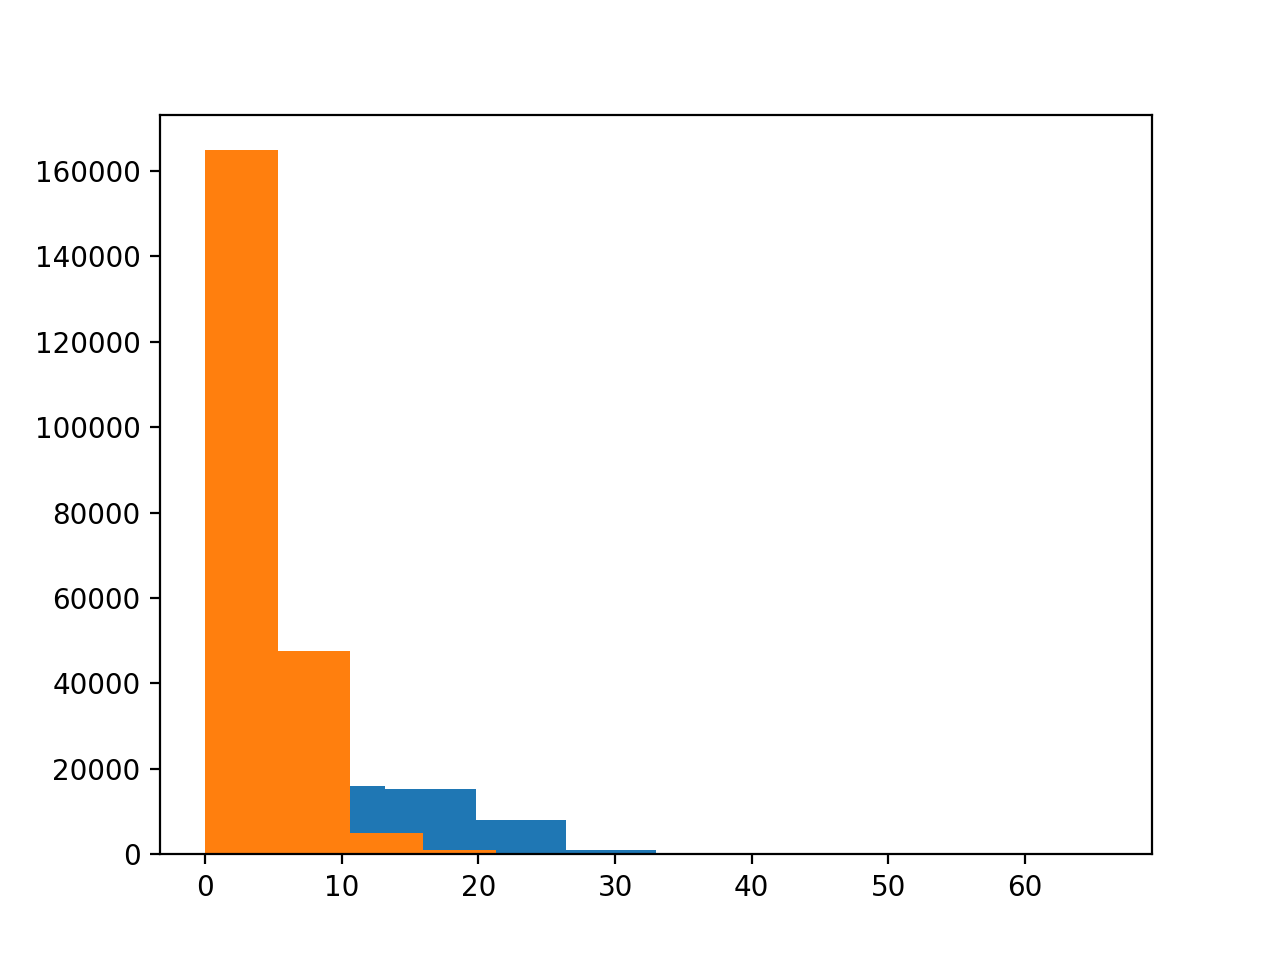

(array([  5.94900000e+03,   1.60990000e+04,   1.53130000e+04,
          8.05500000e+03,   1.11800000e+03,   4.10000000e+02,
          1.07000000e+02,   2.40000000e+01,   1.60000000e+01,
          1.50000000e+01]),
 array([  0. ,   6.6,  13.2,  19.8,  26.4,  33. ,  39.6,  46.2,  52.8,
         59.4,  66. ]),
 <a list of 10 Patch objects>)

In [114]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(stat_shot_gameclock)

In [113]:
stat_shot_gameclock = reduce(lambda x,y: x+y,stat_shot_gameclock)

In [69]:
ourgame_posslog[(ourgame_posslog.GAME_TIME_START < 2604.0) & (ourgame_posslog.GAME_TIME_END >= 2604.0)]

,GAME_ID,POSSESSION_ID,TEAM_ID,SV_GAME_ID,SV_TEAM_ID,PERIOD,PTS,RESULT,DRIBBLES,PASSES,TOUCHES,GAME_CLOCK_START,GAME_CLOCK_END,POSSESSION_LENGTH,GAME_TIME_START,GAME_TIME_END
3073,21400003,173,1610612745,2014102813,10,4,0,Possession,13,7,10,300,274,26,2580.0,2606.0


In [331]:
def find_all_stats(smoothing=800):
    from tqdm import tqdm_notebook
    from scipy.interpolate import splev, splrep

    shotlog14 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2014-15_nba_shot_log.txt', delimiter='\t')
    shotlog15 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2015-16_nba_shot_log.txt', delimiter='\t')
    shotlog16 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2016-17_nba_shot_log.txt', delimiter='\t')
    posslog14 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2014-15_nba_possession_log.txt', delimiter='\t')
    posslog15 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2015-16_nba_possession_log.txt', delimiter='\t')
    posslog16 = pd.read_csv('/Users/hayk/Desktop/NBA_hack2017/Basketball Data-selected/NBAPlayerTrackingData_2014-17/2016-17_nba_possession_log.txt', delimiter='\t')

    shotlog14.loc[:, 'GAME_TIME'] = 0.1 * (7200. * (shotlog14.PERIOD - 1) + (7200. - shotlog14.GAME_CLOCK))
    shotlog15.loc[:, 'GAME_TIME'] = 0.1 * (7200. * (shotlog15.PERIOD - 1) + (7200. - shotlog15.GAME_CLOCK))
    shotlog16.loc[:, 'GAME_TIME'] = 0.1 * (7200. * (shotlog16.PERIOD - 1) + (7200. - shotlog16.GAME_CLOCK))
    
    posslog14.loc[:, 'GAME_TIME_START'] = 0.1 * (7200. * (posslog14.PERIOD - 1) + (7200. - posslog14.GAME_CLOCK_START))
    posslog15.loc[:, 'GAME_TIME_START'] = 0.1 * (7200. * (posslog15.PERIOD - 1) + (7200. - posslog15.GAME_CLOCK_START))
    posslog16.loc[:, 'GAME_TIME_START'] = 0.1 * (7200. * (posslog16.PERIOD - 1) + (7200. - posslog16.GAME_CLOCK_START))
    posslog14.loc[:, 'GAME_TIME_END'] = 0.1 * (7200. * (posslog14.PERIOD - 1) + (7200. - posslog14.GAME_CLOCK_END))
    posslog15.loc[:, 'GAME_TIME_END'] = 0.1 * (7200. * (posslog15.PERIOD - 1) + (7200. - posslog15.GAME_CLOCK_END))
    posslog16.loc[:, 'GAME_TIME_END'] = 0.1 * (7200. * (posslog16.PERIOD - 1) + (7200. - posslog16.GAME_CLOCK_END))

    def minima(a, b = None):
            if b is None:
                b = a
            return b[np.r_[True, a[1:] < a[:-1]] & np.r_[a[:-1] < a[1:], True]]

    all_games = pbp.Game_id.unique()
    stat_games = []
    stat_scores = []
    stat_times = []
    stat_turnovers = []
    stat_open_pc_run = []
    stat_open_pc = []
    stat_3pt_pc_run = []
    stat_3pt_pc = []
    for gameid in tqdm_notebook(all_games):
        our_game = pbp[pbp.Game_id == gameid]
        game_season = our_game.Season.iloc[0]
        if game_season == 2014:
            ourgame_shotlog = shotlog14[shotlog14.GAME_ID == gameid]
            ourgame_posslog = posslog14[posslog14.GAME_ID == gameid]
        elif game_season == 2015:
            ourgame_shotlog = shotlog15[shotlog15.GAME_ID == gameid]
            ourgame_posslog = posslog15[posslog15.GAME_ID == gameid]
        elif game_season == 2016:
            ourgame_shotlog = shotlog16[shotlog16.GAME_ID == gameid]
            ourgame_posslog = posslog16[posslog16.GAME_ID == gameid]
        else:
            print 'WTF?'
            break
        if (not (gameid in ourgame_shotlog.GAME_ID.unique())) or (not (gameid in ourgame_posslog.GAME_ID.unique())):
            continue
        home_team = our_game.Home_Tm.iloc[0]
        away_team = our_game.Away_Tm.iloc[0]
        home_team_id = our_game.Home_Team_id.iloc[0]
        away_team_id = our_game.Visitor_Team_id.iloc[0]
        x = np.array(our_game.Game_Time)
        for homvis in [-1, 1]:
            if homvis == -1:
                our_team_id = away_team_id
                op_team_id = home_team_id
                op_team = home_team
            else:
                our_team_id = home_team_id
                op_team_id = away_team_id
                op_team = away_team
                    
            y = homvis * np.array(our_game.Score_diff)
            spl = splrep(x, y, s=smoothing)
            for q in range(4):
                x2 = np.linspace(720. * q, 720. * (q + 1), 500)
                y2 = splev(x2, spl)
                max_time = minima(-y2, x2)
                min_time = minima(y2, x2)
                max_scor = -minima(-y2)
                min_scor = minima(y2)
                if (len(max_time) == 0):
                    continue
                if max_time[0] < min_time[0]:
                    max_time = max_time[1:]
                    max_scor = max_scor[1:]
                if (len(max_time) == 0):
                    continue
                if min_time[-1] > max_time[-1]:
                    min_time = min_time[:-1]
                    min_scor = min_scor[:-1]

                run_times = max_time - min_time
                run_scores = max_scor - min_scor
                del_indexes = run_scores > 6
                run_times = run_times[del_indexes]
                run_scores = run_scores[del_indexes]
                min_time = min_time[del_indexes]
                max_time = max_time[del_indexes]
                
                # counting overall shots during the game
                our_shots = ourgame_shotlog[ourgame_shotlog.TEAM_ID == our_team_id]
                overall_shots = len(our_shots[(our_shots.SHOT_RESULT == 'made')])
                open_shots = len(our_shots[(our_shots.CLOSE_DEF_DIST >= 4) & (our_shots.SHOT_RESULT == 'made')])
                three_pt_shots = len(our_shots[(our_shots.PTS_TYPE == 3) & (our_shots.SHOT_RESULT == 'made')])
                shot_gameclock = [(shot_time - ourgame_posslog[(ourgame_posslog.GAME_TIME_START < shot_time) & (ourgame_posslog.GAME_TIME_END >= shot_time)].GAME_TIME_START) for shot_time in our_shots.GAME_TIME]
                print shot_gameclock
                
                for rn in range(len(run_scores)):
                    # counting turnovers
                    during_run = our_game[(our_game.Game_Time >= min_time[rn]) & (our_game.Game_Time < max_time[rn])]
                    turnovers = len(during_run.Description[[(('Turnover' in str(phrase)) and
                                                             (op_team in str(phrase))) for phrase in during_run.Description]])
                    
                    # counting shots during the run
                    run_shotlog = ourgame_shotlog[(ourgame_shotlog.GAME_TIME >= min_time[rn]) & (ourgame_shotlog.GAME_TIME < max_time[rn])]
                    our_shots_run = run_shotlog[run_shotlog.TEAM_ID == our_team_id]
                    overall_shots_run = len(our_shots_run[(our_shots_run.SHOT_RESULT == 'made')])
                    open_shots_run = len(our_shots_run[(our_shots_run.CLOSE_DEF_DIST >= 4) & (our_shots_run.SHOT_RESULT == 'made')])
                    three_pt_shots_run = len(our_shots_run[(our_shots_run.PTS_TYPE == 3) & (our_shots_run.SHOT_RESULT == 'made')])
                    if overall_shots_run == 0:
                        # free throws are not recorded in the shotlog
                        continue
                    
                    stat_games.append(gameid)
                    stat_scores.append(run_scores[rn])
                    stat_times.append(run_times[rn])
                    stat_turnovers.append(turnovers)
                    stat_3pt_pc_run.append(100. * three_pt_shots_run / overall_shots_run)
                    stat_3pt_pc.append(100. * three_pt_shots / overall_shots)
                    stat_open_pc_run.append(100. * open_shots_run / overall_shots_run)
                    stat_open_pc.append(100. * open_shots / overall_shots)
                    
    stat_games = np.array(stat_games)
    stat_scores = np.array(stat_scores)
    stat_times = np.array(stat_times)
    stat_turnovers = np.array(stat_turnovers)
    stat_3pt_pc_run = np.array(stat_3pt_pc_run)
    stat_3pt_pc = np.array(stat_3pt_pc)
    stat_open_pc_run = np.array(stat_open_pc_run)
    stat_open_pc = np.array(stat_open_pc)
    return (stat_games, stat_scores, stat_times, stat_turnovers, stat_open_pc_run, stat_open_pc, stat_3pt_pc_run, stat_3pt_pc)

In [ ]:
data600 = find_all_stats(600)
stat_games600 = data600[0]
stat_scores600 = data600[1]
stat_times600 = data600[2]
stat_turnovers600 = data600[3]
stat_open_pc_run600 = data600[4]
stat_open_pc600 = data600[5]
stat_3pt_pc_run600 = data600[6]
stat_3pt_pc600 = data600[7]

[Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 144    0.3
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 99    0.9
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START,

[Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 144    0.3
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 99    0.9
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START,

[Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 137    1.0
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_STAR

[Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 2943    1.0
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_STA

Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64)]
[Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: f

[Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 4110    0.8
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 4032    2.4
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_STA

[Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 4110    0.8
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 4032    2.4
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_STA

[Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 4026    1.0
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_START, dtype: float64), 4106    2.1
Name: GAME_TIME_START, dtype: float64, 4146    0.6
Name: GAME_TIME_START, dtype: float64, Series([], Name: GAME_TIME_START, dtype: float64), Series([], Name: GAME_TIME_STA

KeyboardInterrupt: 

In [252]:
data800 = find_all_stats(800)
stat_games800 = data800[0]
stat_scores800 = data800[1]
stat_times800 = data800[2]
stat_turnovers800 = data800[3]
stat_open_pc_run800 = data800[4]
stat_open_pc800 = data800[5]
stat_3pt_pc_run800 = data800[6]
stat_3pt_pc800 = data800[7]

<IPython.core.display.Javascript object>


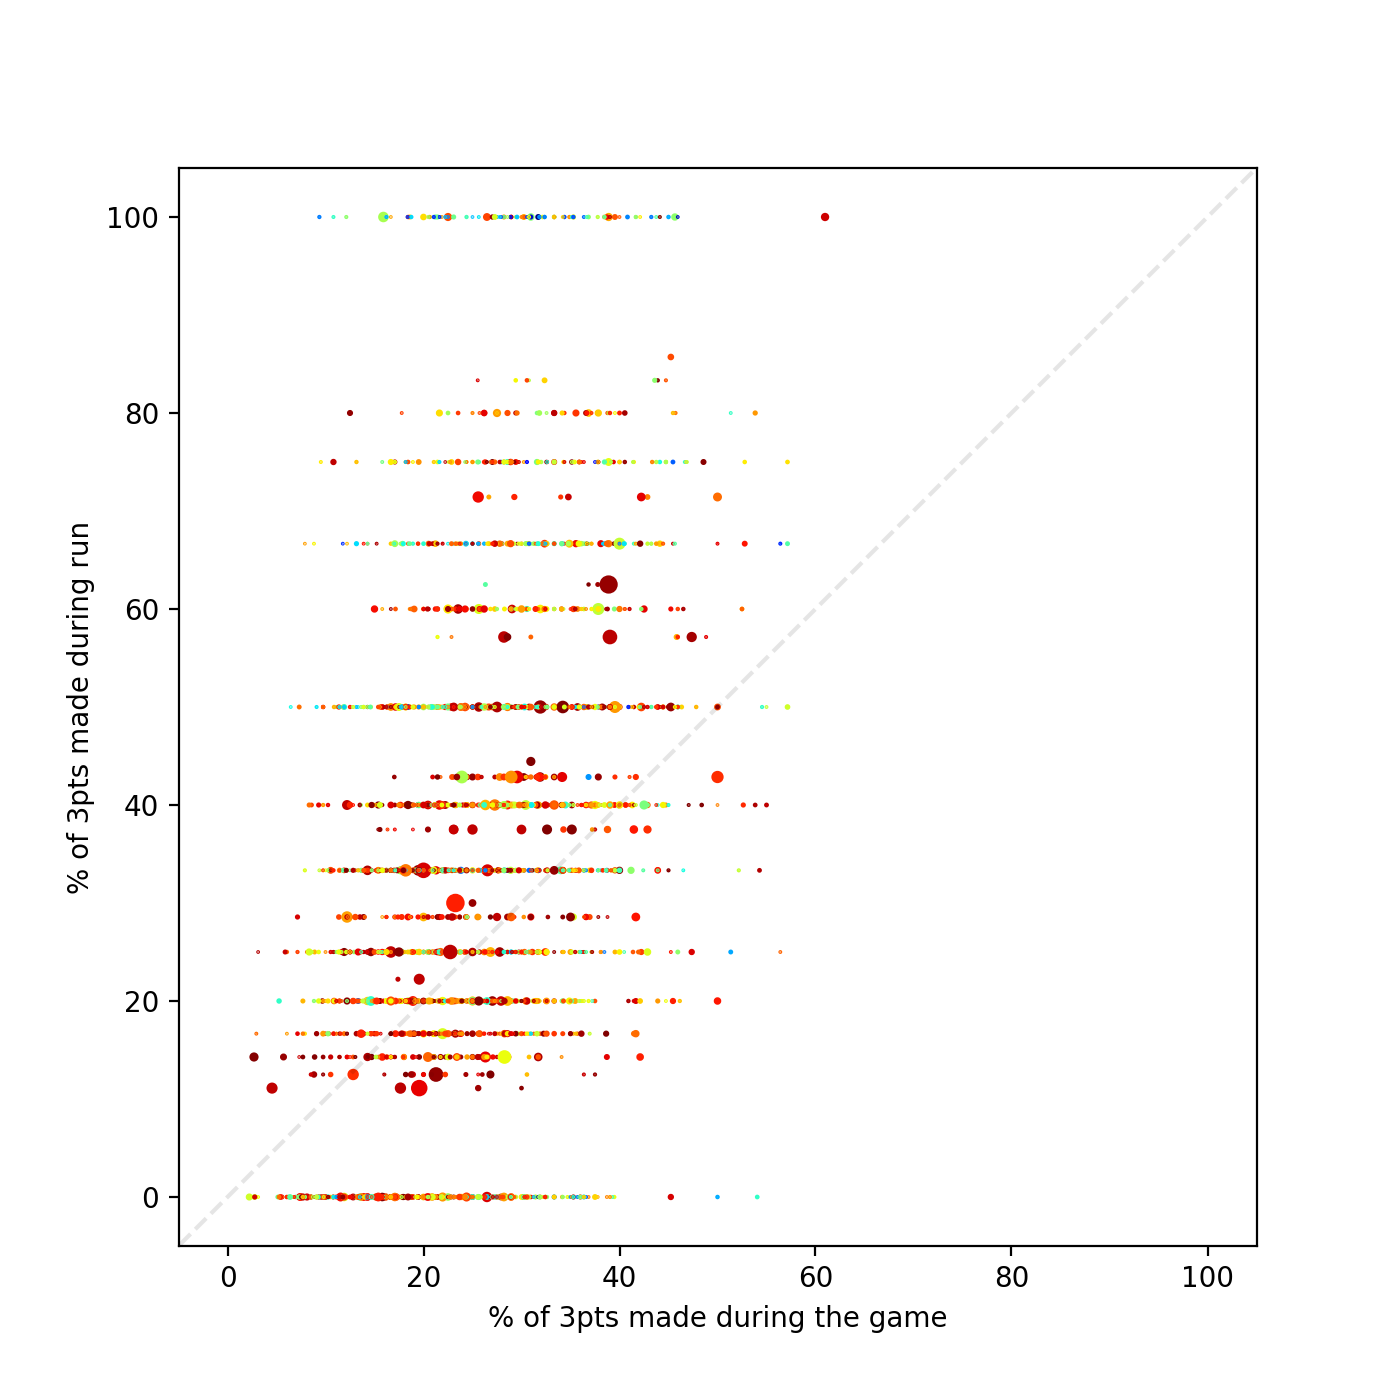

In [297]:
%matplotlib notebook
# # # # # # # # # # # # # # # # # # 
#
# analizing 3pt shots
#
# # # # # # # # # # # # # # # # # # 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))

ax.plot([-100, 200],[-100, 200], ls='--', alpha=0.1, c='black')
indices = (stat_times800 < 5 * 60.)
ax.scatter(stat_3pt_pc800[indices], stat_3pt_pc_run800[indices], 
           s = (2 * stat_scores800[indices] / stat_scores800[indices].max())**5,
           c=stat_times800[indices], 
           cmap='jet')
# ax.scatter(stat_open_per_run600, stat_open_per600, s=5)
ax.set_ylabel('% of 3pts made during run')
ax.set_xlabel('% of 3pts made during the game')
ax.set_xlim(-5, 105)
ax.set_ylim(-5, 105)
ax.set_aspect(1)

<IPython.core.display.Javascript object>


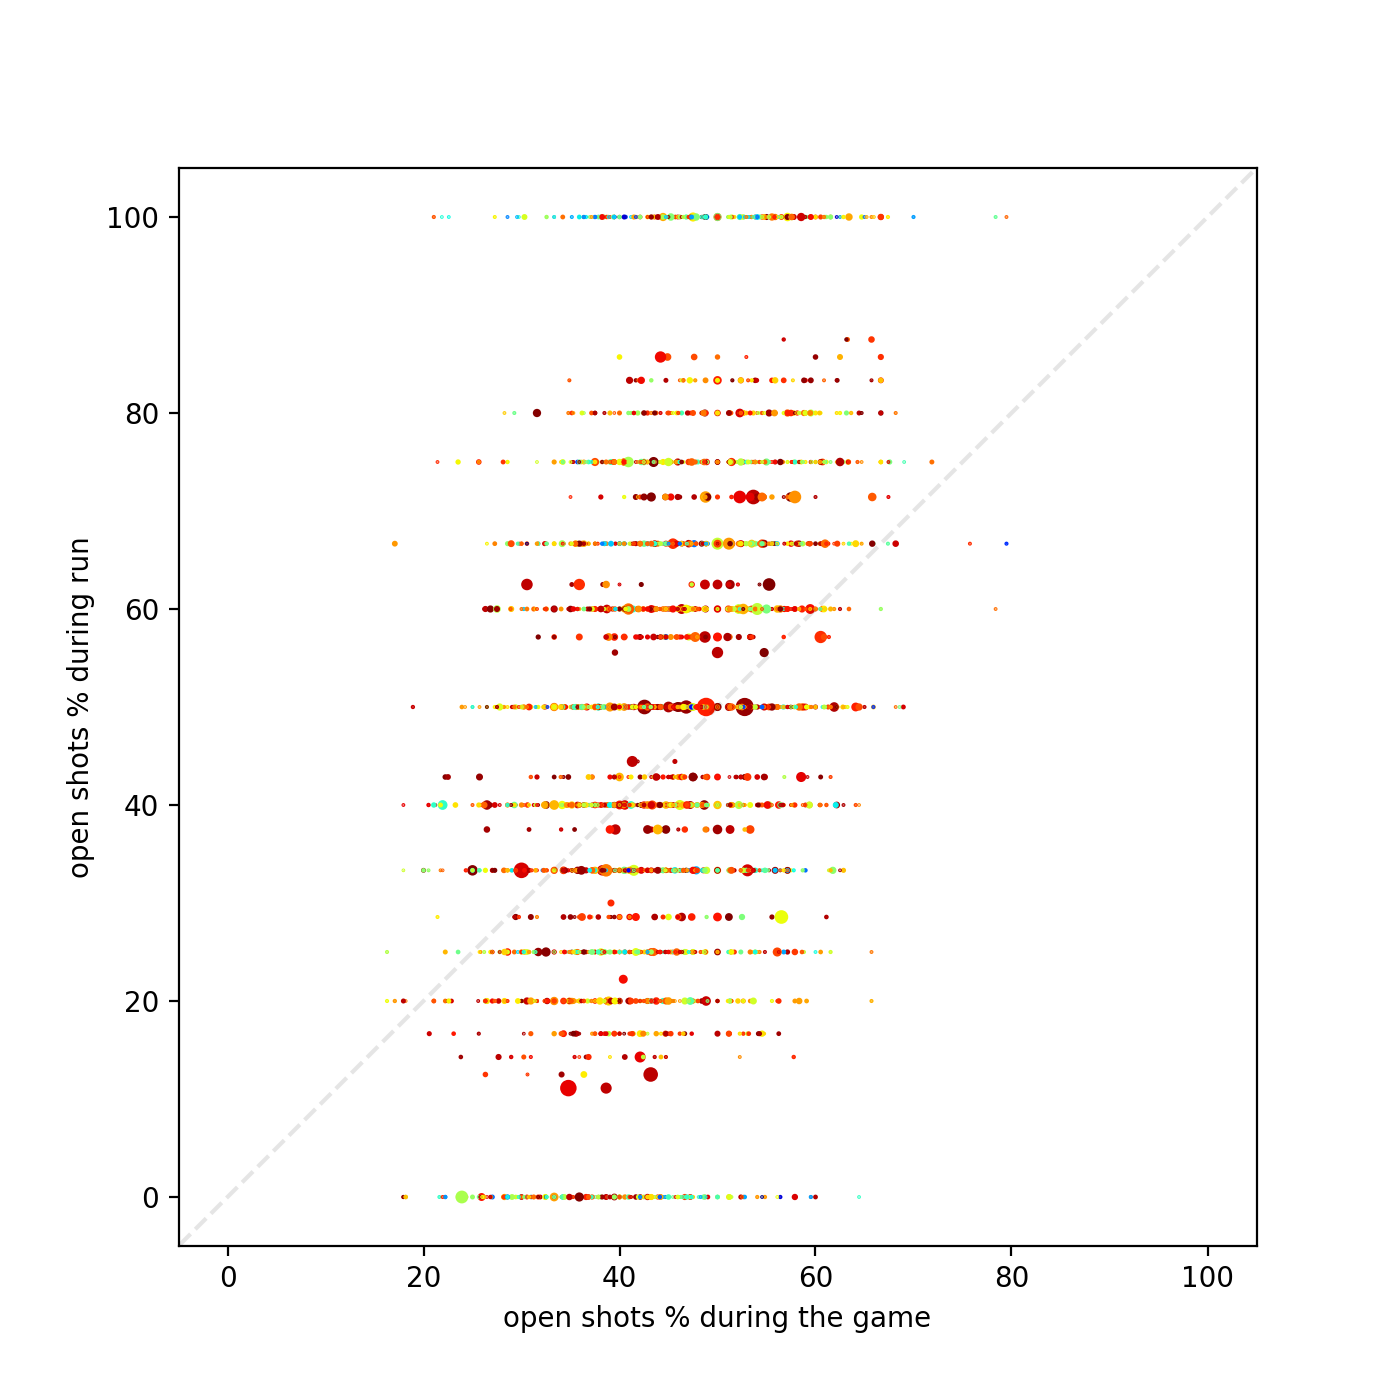

In [298]:
%matplotlib notebook
# # # # # # # # # # # # # # # # # # 
#
# analizing open shots
#
# # # # # # # # # # # # # # # # # # 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
# ax.scatter(stat_open_per_run800, stat_open_per800, s=5, c='red')
indices = (stat_times800 < 5 * 60.)
ax.scatter(stat_open_pc800[indices], stat_open_pc_run800[indices], 
           s = (2 * stat_scores800[indices] / stat_scores800[indices].max())**5,
           c = stat_times800[indices], 
           cmap = 'jet')
ax.plot([-100, 200],[-100, 200], ls='--', alpha=0.1, c='black')
ax.set_ylabel('open shots % during run')
ax.set_xlabel('open shots % during the game')
ax.set_xlim(-5, 105)
ax.set_ylim(-5, 105)
ax.set_aspect(1)

<IPython.core.display.Javascript object>


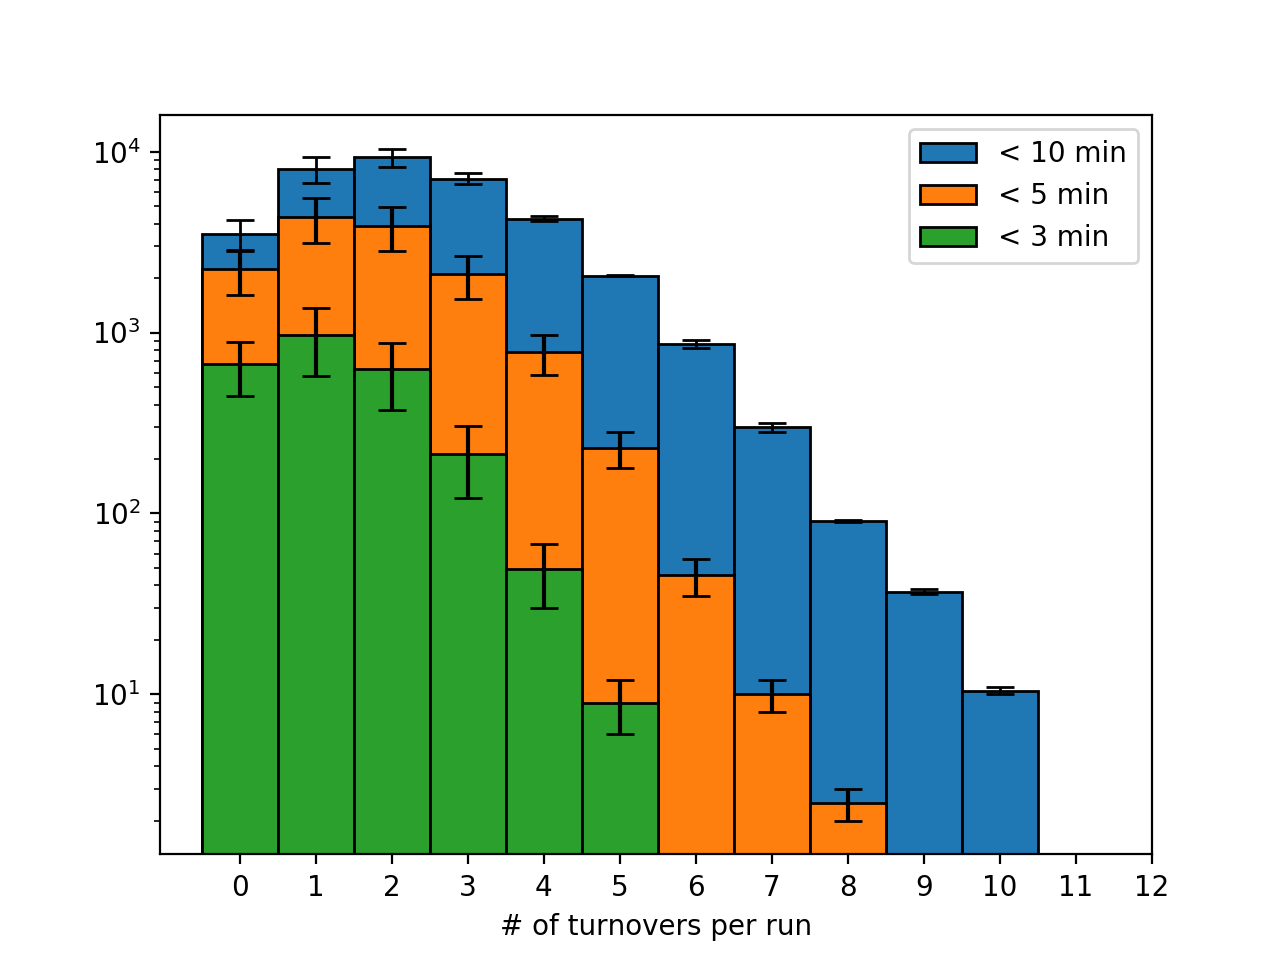

In [395]:
%matplotlib notebook
# # # # # # # # # # # # # # # # # # 
#
# analizing turnovers
#
# # # # # # # # # # # # # # # # # # 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
def average_hist_data(data_points1, data_points2):
    bin_number1 = data_points1.max()
    bin_number2 = data_points2.max()
    hist_data1 = np.histogram(data_points1, bins=bin_number1)[0];
    hist_data2 = np.histogram(data_points2, bins=bin_number2)[0];
    if bin_number1 < bin_number2:
        hist_data1 = np.concatenate((hist_data1, [0] * (bin_number2 - bin_number1)))
        bin_number1 = bin_number2
    elif bin_number1 > bin_number2:
        hist_data2 = np.concatenate((hist_data2, [0] * (bin_number1 - bin_number2)))
        bin_number2 = bin_number1
    aver_dat = (hist_data1 + hist_data2) * 0.5
    bin_number = bin_number1
    err_up = hist_data1 - aver_dat
    err_dw = aver_dat - hist_data2
    return (aver_dat, bin_number, err_up, err_dw)

dat, bins, err_up, err_dw = average_hist_data(stat_turnovers600[(stat_times600/60. < 10)], 
                                              stat_turnovers800[(stat_times800/60. < 10)])
ax.bar(np.arange(bins), dat, width=1, edgecolor='black', label='< 10 min', yerr=[err_up, err_dw], 
                                      error_kw=dict(lw=1, capsize=5, capthick=1))
dat, bins, err_up, err_dw = average_hist_data(stat_turnovers600[(stat_times600/60. < 5)], 
                                              stat_turnovers800[(stat_times800/60. < 5)])
ax.bar(np.arange(bins), dat, width=1, edgecolor='black', label='< 5 min', yerr=[err_up, err_dw], capsize=5)
dat, bins, err_up, err_dw = average_hist_data(stat_turnovers600[(stat_times600/60. < 3)], 
                                              stat_turnovers800[(stat_times800/60. < 3)])
ax.bar(np.arange(bins), dat, width=1, edgecolor='black', label='< 3 min', yerr=[err_up, err_dw], capsize=5)
ax.set_xticks(np.linspace(0, 12, 13))
ax.legend(loc='upper right');
ax.set_xlabel('# of turnovers per run');
ax.set_yscale('log')

<IPython.core.display.Javascript object>


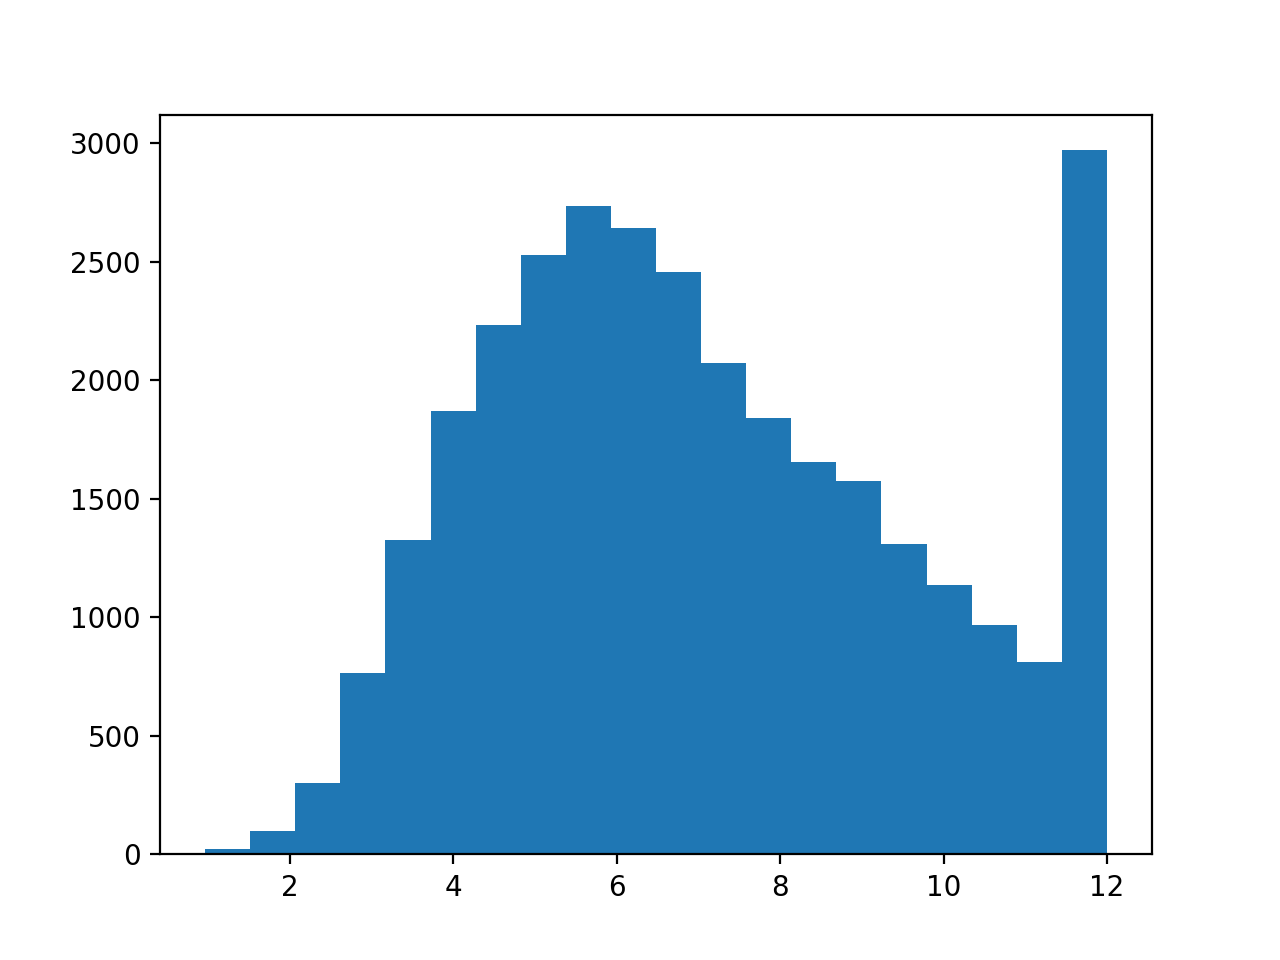

In [63]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(stat_times/60., bins=20);

<IPython.core.display.Javascript object>


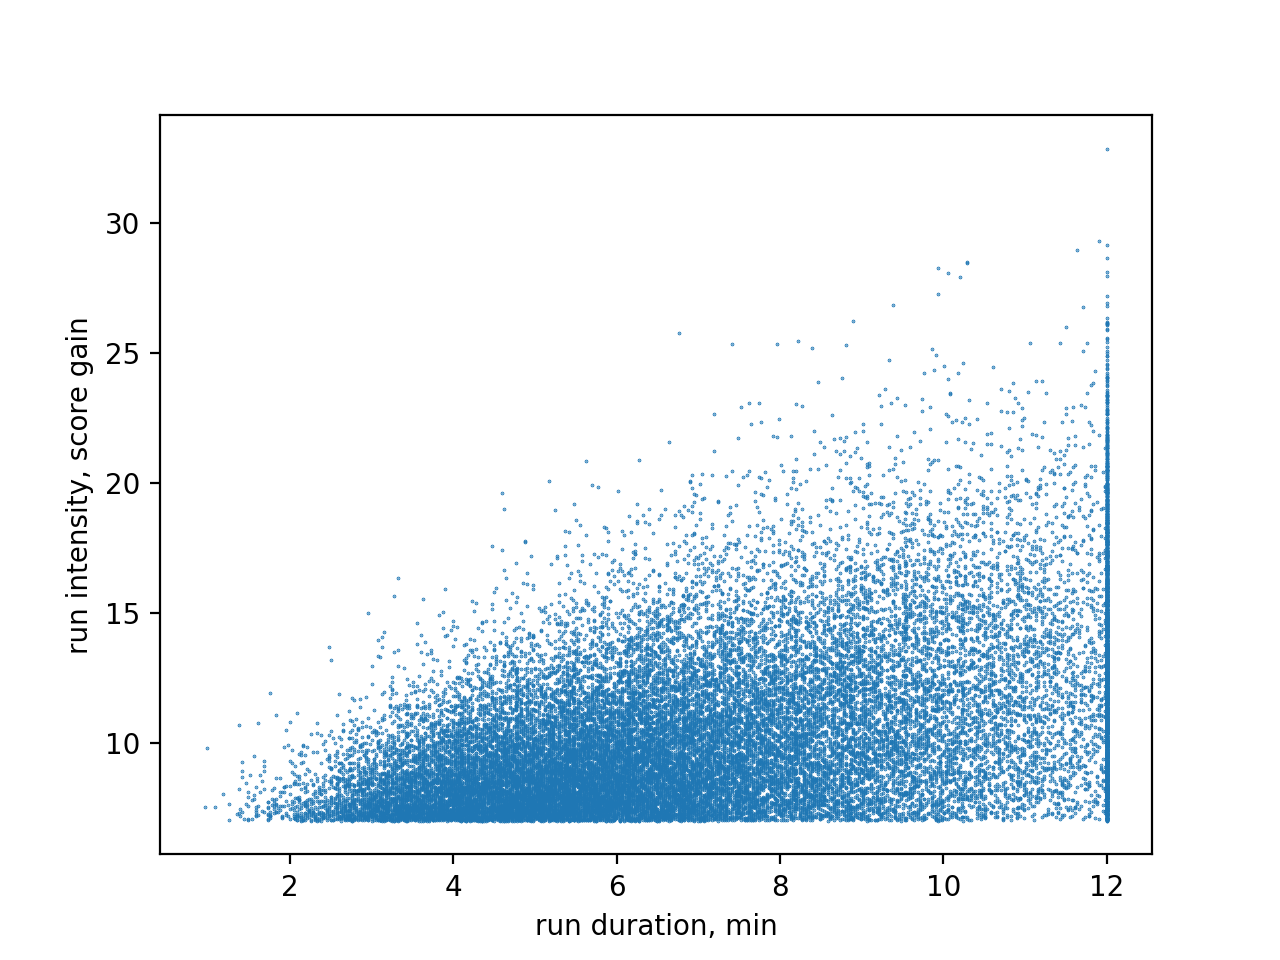

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x=stat_times/60., y=stat_scores, s=.1, cmap='jet');
# ax.set_xlim(0, 20)
# ax.set_ylim(0, 30)
# ax.hist(np.array(stat_times)/60., bins=100);
ax.set_xlabel('run duration, min')
ax.set_ylabel('run intensity, score gain')

In [ ]:
# derivative
# dy2 = np.zeros(y2.shape,np.float)
# dy2[0:-1] = np.diff(y2) / np.diff(x)
# dy2[-1] = (y2[-1] - y2[-2]) / (x[-1] - x[-2])
# plt.plot(x, dy2*200)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


<IPython.core.display.Javascript object>


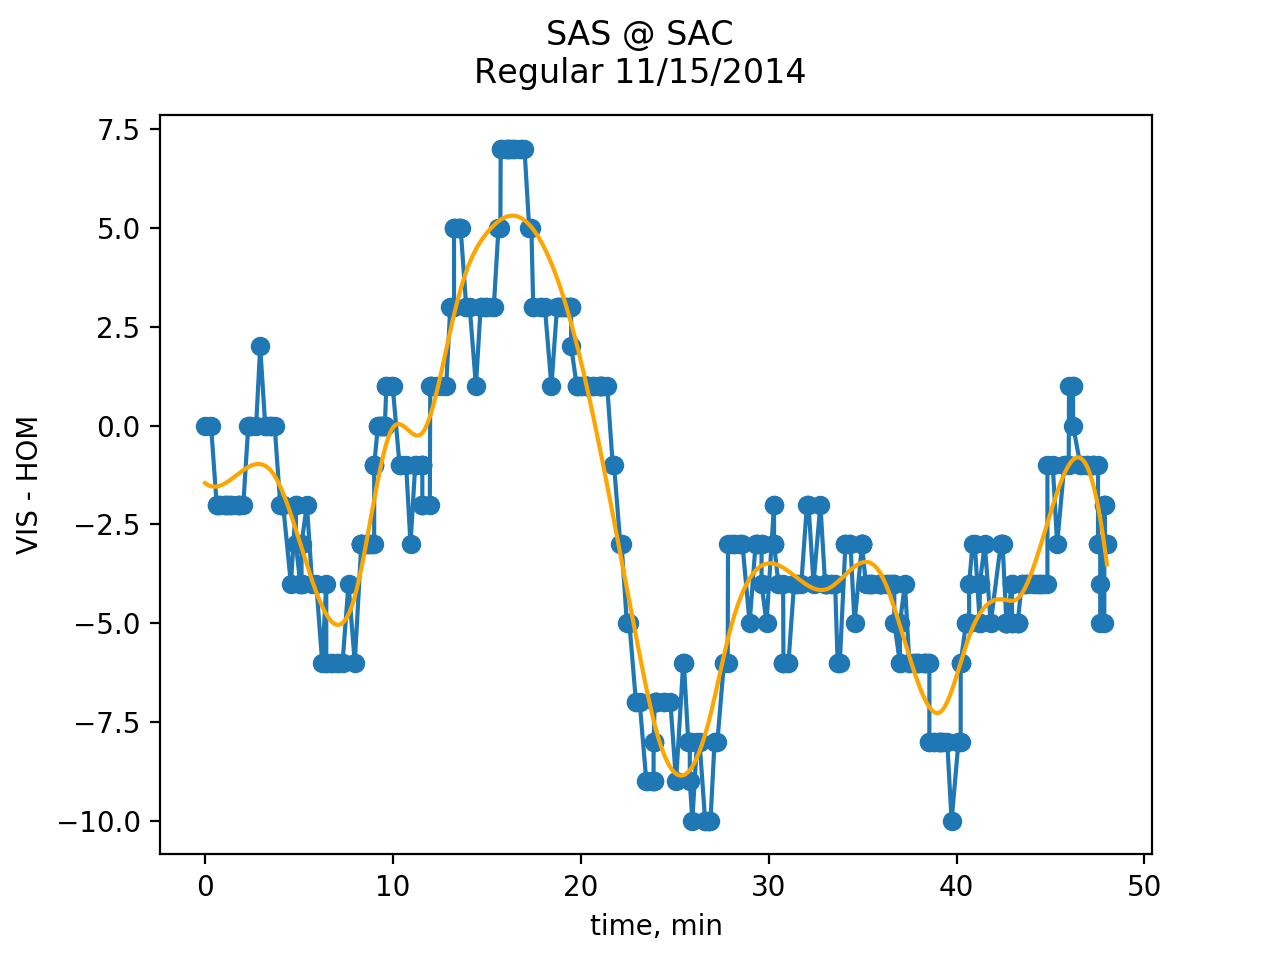

In [228]:
%time
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
gameid = np.random.choice(pbp.Game_id.unique())
# our_game = pbp[pbp.Game_id == gameid]
our_game = pbp[pbp.Game_id == 21400139]

homvis = -1

home_team = our_game.Home_Tm.unique()[0]
away_team = our_game.Away_Tm.unique()[0]
    
x = np.array(our_game.Game_Time)
y = homvis * np.array(our_game.Score_diff)
plt.plot(x/60., y, '-o');

spl = splrep(x, y, s=600)
plt.suptitle(our_game.Away_Tm.unique()[0] + " @ " + our_game.Home_Tm.unique()[0] + 
             '\n' + our_game.Season_Type.unique()[0] + " " + our_game.Date.unique()[0]);

def minima(a, b = None):
    if b is None:
        b = a
    return b[np.r_[True, a[1:] < a[:-1]] & np.r_[a[:-1] < a[1:], True]]

for q in range(4):
    x2 = np.linspace(720. * q, 720. * (q + 1), 500)
    y2 = splev(x2, spl)
    max_time = minima(-y2, x2)
    min_time = minima(y2, x2)
    max_scor = -minima(-y2)
    min_scor = minima(y2)
    if (len(max_time) == 0):
        continue
    if max_time[0] < min_time[0]:
        max_time = max_time[1:]
        max_scor = max_scor[1:]
    if (len(max_time) == 0):
        continue
    if min_time[-1] > max_time[-1]:
        min_time = min_time[:-1]
        min_scor = min_scor[:-1]

    run_times = max_time - min_time
    run_scores = max_scor - min_scor
    del_indexes = run_scores > 6
    run_times = run_times[del_indexes]
    run_scores = run_scores[del_indexes]
    min_time = min_time[del_indexes]
    max_time = max_time[del_indexes]
    plt.plot(x2/60., y2, c='orange');
    for miny2 in min_time:
        plt.axvline(miny2/60.+0.25, c='red');
    for maxy2 in max_time:
        plt.axvline(maxy2/60.-0.25, c='green');
        
    for rn in range(len(run_scores)):
        during_run = our_game[(our_game.Game_Time >= min_time[rn]) & (our_game.Game_Time < max_time[rn])]
        if homvis == -1:
            op_team = home_team
        else:
            op_team = away_team
        turnovers = len(during_run.Description[[(('Turnover' in str(phrase)) and
                                                 (op_team in str(phrase))) for phrase in during_run.Description]])
        print turnovers, run_times[rn]/60.
#         if turnovers == 5:
#             print during_run.Description

if homvis == 1:
    plt.ylabel('HOM - VIS');
else:
    plt.ylabel('VIS - HOM');
plt.xlabel('time, min');

In [34]:
from tqdm import tqdm_notebook
from scipy.interpolate import splev, splrep
stat_games = []
stat_x1 = []
stat_x2 = []
for gameid in tqdm_notebook(pbp.Game_id.unique()):
    our_game = pbp[pbp.Game_id == gameid]
    x = np.array(our_game.Game_Time)
    y = np.array(our_game.Score_diff)
    spl = splrep(x, y, s=300)
    y2 = splev(x, spl)

    def minima(a, b = None):
        if b is None:
            b = a
        return b[np.r_[True, a[1:] < a[:-1]] & np.r_[a[:-1] < a[1:], True]]

    max_time = minima(-y2, x)
    min_time = minima(y2, x)
    max_scor = -minima(-y2)
    min_scor = minima(y2)
    if (len(max_time) == 0):
        continue
    if max_time[0] < min_time[0]:
        max_time = max_time[1:]
        max_scor = max_scor[1:]
    if (len(max_time) == 0):
        continue
    if min_time[-1] > max_time[-1]:
        min_time = min_time[:-1]
        min_scor = min_scor[:-1]
    
    
    run_times = max_time - min_time
    run_scores = max_scor - min_scor
    if len(run_scores) > 0:
        stat_x1.append((run_scores**2 / run_times).max())
        stat_games.append(gameid)
        stat_x2.append(our_game.Score_diff.max() - our_game.Score_diff.min())

In [41]:
stat_games = np.array(stat_games)
stat_x2 = np.array(stat_x2)
stat_games[(stat_x2 > 50)]

array([20700221, 20700666, 20700989, 20800528, 20800795, 20900582,
       20900646, 20900887, 21000417, 21000558, 21000560, 21200201,
       21200665, 21200697, 21200884, 21300284, 21300552, 21300763,
       21300916, 21400120, 21400128, 21400175, 21400474, 21500051,
       21500305, 21500992, 21501104, 21600662, 40800154, 41400126])

<IPython.core.display.Javascript object>


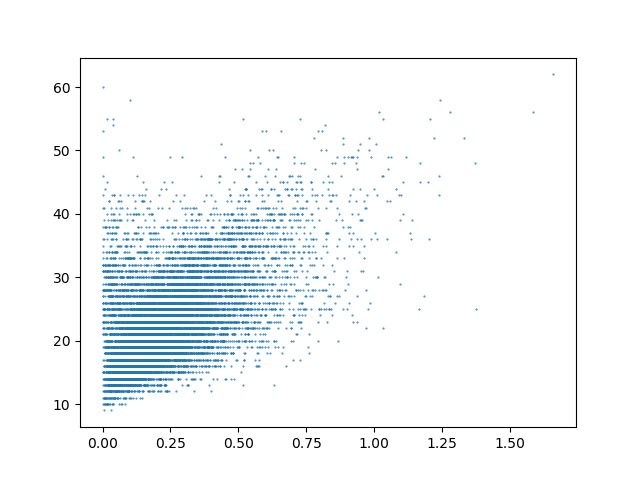

In [93]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
stat_x1 = np.array(stat_x1)
stat_x2 = np.array(stat_x2)
stat_games = np.array(stat_games)
ax.scatter(stat_x1, stat_x2, s=0.2)